# Coursera Capstone - REPORT

### Content

1. Introduction Section :

   1.1 Discussion of the "backgroung situation" leading to the problem at hand:

   1.2 Problem to be resolved

   1.3 Audience for this project.
   

2. Data Section:

   2.1 Data of Current Situation (current residence place)

   2.2 Data required to resolve the problem

   2.3 Data sources and data manipulation
   

3. Methodology section :

   3.1 Process steps and strategy to resolve the problem

   3.2 Data Science Methods, machine learing, mapping tools and exploratory data analysis.
   

4. Results section

   4.1 Discussion of the results and how they help to take a decision.
   

5. Discussion section

   5.1 Elaboration and discussion on any observations and/or recommendations for improvement.
   

6. Conclusion section

   6.1 Desicison taken and Report Conclusion.

# 1. Introduction Section :

### Discussion of the business problem and the audience who would be interested in this project.¶

### 1.1 Scenario and Background

### 1.2 Problem to be resolved:

### 1.3 Interested Audience

# 2. Data Section:

### Description of the data and its sources that will be used to solve the problem

### 2.1 Data Required to resolve the problem

### 2.2 How the data will be used to solve the problem

### 2.3 Mapping of Data

# 3. Methodology section:

### 3.1 Process steps and strategy to resolve the problem

### 3.2 Data Science Methods, machine learing, mapping tools and exploratory data analysis.

In [ ]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests

from bs4 import BeautifulSoup

!pip install geopy # uncomment this line if you haven't completed the Foursquare API lab
# from geopy import geocoder
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import os

import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# Matplotlib and associated plotting modules
# Matplotlib and associated plotting modules

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import csv # implements classes to read and write tabular data in CSV form

print('Libraries imported.')

In [2]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [3]:
new_york_data=get_new_york_data()

In [4]:
new_york_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [5]:
new_york_data.shape

(306, 4)

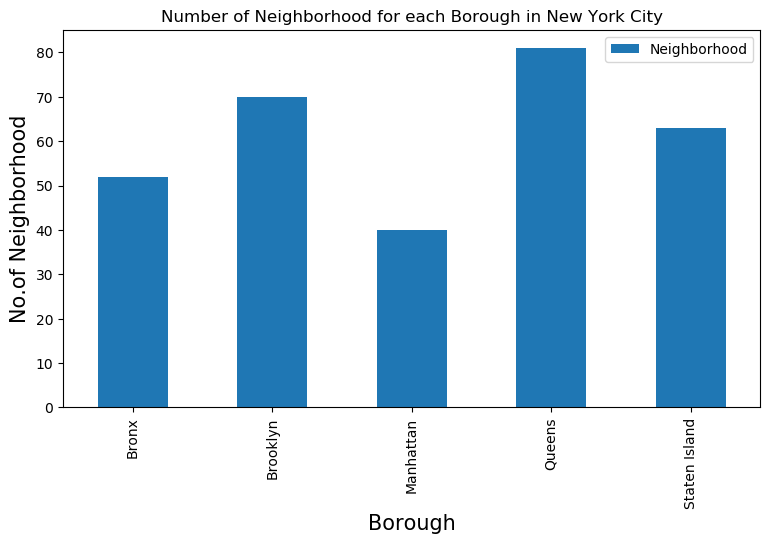

In [6]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhood for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
new_york_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()


In [7]:
new_york_data['Borough'].value_counts().to_frame()

,Borough
Queens,81
Brooklyn,70
Staten Island,63
Bronx,52
Manhattan,40


In [8]:
new_york_data.shape

(306, 4)

In [9]:
print(new_york_data.Borough.unique())

['Bronx' 'Manhattan' 'Brooklyn' 'Queens' 'Staten Island']


In [10]:
new_york_data = new_york_data.loc[(new_york_data['Borough'] == 'Brooklyn')|(new_york_data['Borough'] == 'Manhattan')]
new_york_data = new_york_data.reset_index(drop=True)
new_york_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Brooklyn,Bay Ridge,40.625801,-74.030621
2,Brooklyn,Bensonhurst,40.611009,-73.995180
3,Brooklyn,Sunset Park,40.645103,-74.010316
4,Brooklyn,Greenpoint,40.730201,-73.954241


In [11]:
new_york_data.shape

(110, 4)

In [11]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))



The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [12]:
# create map of New York using latitude and longitude values
map_new_york = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(new_york_data['Latitude'], new_york_data['Longitude'], new_york_data['Borough'], new_york_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_new_york )  
    
map_new_york

In [13]:
CLIENT_ID = '5QH431DEX2VYMOZERAM2G22WABZ5XD5GIQZHTAKY0WQ4D4OW' # your Foursquare ID
CLIENT_SECRET = 'TLZODC5EW3KXJHRL4MRCPG5Y2B4JCDSS3RFSVSF4OQJ3KWA5' # your Foursquare Secret
VERSION = '20200225'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5QH431DEX2VYMOZERAM2G22WABZ5XD5GIQZHTAKY0WQ4D4OW
CLIENT_SECRET:TLZODC5EW3KXJHRL4MRCPG5Y2B4JCDSS3RFSVSF4OQJ3KWA5


In [16]:
def getNearbyVenues(names, latitudes, longitudes, LIMIT=200, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)                             

In [18]:
BM_venues = getNearbyVenues(names=new_york_data['Neighborhood'],
                                  latitudes=new_york_data['Latitude'],
                                  longitudes=new_york_data['Longitude'],
                                  LIMIT=200)

print('The "BM_venues" dataframe has {} venues and {} unique venue types.'.format(
      len(BM_venues['Venue Category']),
      len(BM_venues['Venue Category'].unique())))

BM_venues.to_csv('BM_venues.csv', sep=',', encoding='UTF8')
BM_venues.head()

Marble Hill
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
1,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Sam's Pizza,40.879435,-73.905859,Pizza Place
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


In [21]:
results = requests.get(url).json()
results

{'meta': {'code': 429,
  'errorType': 'quota_exceeded',
  'errorDetail': 'Quota exceeded',
  'requestId': '5e7b873a9fcb92001b19d607'},
 'response': {}}

In [ ]:
new_york_venues.shape

In [ ]:
def Venues_Map(Borough_name, Borough_neighborhoods):
    
    # Use geopy library to get the latitude and longitude values 
    geolocator = Nominatim(user_agent="Jupyter")
    Borough_location = geolocator.geocode(Borough_name) #'Brooklyn, NY'
    Borough_latitude = Borough_location.latitude
    Borough_longitude = Borough_location.longitude
    print('The geographical coordinates of "{}" are {}, {}.'.format(Borough_name, Borough_latitude, Borough_longitude))
    
    # To verify the number of Boroughs and Neighborhoods in the extracted data
    print('The "{}" dataframe has {} different venue types and {} neighborhoods.'.format(
          Borough_name,
          len(Borough_neighborhoods['Venue Category'].unique()),
          len(Borough_neighborhoods['Neighborhood'].unique())))
    
    # create map of city using latitude and longitude values
    map_Borough = folium.Map(location=[Borough_latitude, Borough_longitude], zoom_start=10)

    # add markers to map
    for lat, lng, venue, category in zip(Borough_neighborhoods['Venue Latitude'], Borough_neighborhoods['Venue Longitude'], Borough_neighborhoods['Venue'], Borough_neighborhoods['Venue Category']):
        label = '{}, {}'.format(category, venue)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=0.1,
            popup=label,
            color='red',
            fill=True,
            fill_color='#FF0000',
            fill_opacity=0.3).add_to(map_Borough)  

    return map_Borough

In [ ]:
Venues_Map('New York City, NY', new_york_venues)

In [ ]:
new_york_venues.groupby('Venue Category')['Venue'].count().sort_values(ascending=False)

In [ ]:
new_york_venues.groupby('Neighborhood').count()

In [ ]:
print('There are {} uniques categories.'.format(len(new_york_venues['Venue Category'].unique())))

In [ ]:
# one hot encoding
new_york_onehot = pd.get_dummies(new_york_venues[['Venue Category']], prefix="", prefix_sep="")

#column lists before adding neighborhood
column_names = ['Neighborhood'] + list(new_york_onehot.columns)

# add neighborhood column back to dataframe
new_york_onehot['Neighborhood'] = new_york_venues['Neighborhood'] 

# move neighborhood column to the first column
new_york_onehot = new_york_onehot[column_names]

new_york_onehot.head()

In [ ]:
restaurant_List = []
search = 'Restaurant'
for i in new_york_onehot.columns :
    if search in i:
        restaurant_List.append(i)

In [ ]:
restaurant_List

In [ ]:
col_name = []
col_name = ['Neighborhood'] + restaurant_List
BM_restaurant = new_york_onehot[col_name]
BM_restaurant = BM_restaurant.iloc[:,1::]

In [ ]:
BM_restaurant_grouped = BM_restaurant.groupby('Neighborhood').sum().reset_index()

In [ ]:
BM_restaurant_grouped['Total'] = BM_restaurant_grouped .sum(axis=1)

In [ ]:
BM_restaurant_grouped

In [ ]:
print (new_york_venues['Venue Category'].value_counts())

In [ ]:
# create a dataframe of top 10 categories
new_york_5_Dist_Venues_Top10 = new_york_venues['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
new_york_5_Dist_Venues_Top10=new_york_5_Dist_Venues_Top10.reset_index()
#new_yprk_5_Dist_Venues_Top10

new_york_5_Dist_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
new_york_5_Dist_Venues_Top10

new_york_5_Dist_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
new_york_5_Dist_Venues_Top10

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue_Category", y="Frequency", data=new_york_5_Dist_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues in 5 Major Districts of Tokyo', fontsize=15)
plt.xlabel("Venue_Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()